# Delta Kinematics Graphs

In [37]:
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from sympy import UnevaluatedExpr as uneval
from IPython.display import display, Math
from sympy.physics.vector.printing import vlatex
from deltakinematics import DeltaArm

from visualization import VizScene 
from visualization import ArmPlayer

np.set_printoptions(precision=4, suppress=True)

## Define a basic arm

link vector= [ 0.     -0.6598 -0.7514]
Length: 3.5
link vector= [-0.5714  0.3299 -0.7514]
Length: 3.5
link vector= [ 0.5714  0.3299 -0.7514]
Length: 3.5


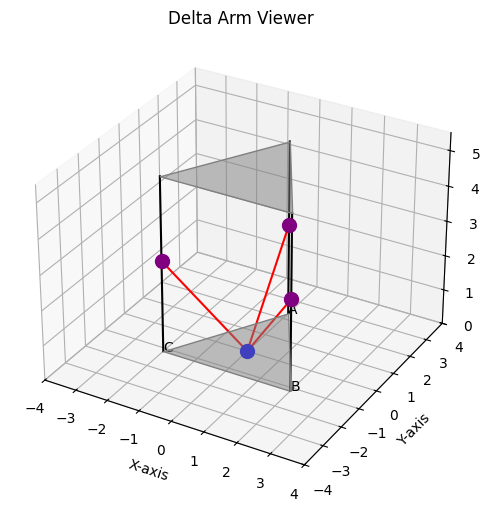

In [48]:
#     DeltaArm(l,   w, h)
arm = DeltaArm(3.5, 4, 5)
arm.plotArm(pos=np.array([0, 0, 0]))

## Build Area of Delta Arm

Plot the area of a delta arm at the bottom of the base

In [39]:
arm.base_B

array([ 2.    , -1.1547,  0.    ])

In [40]:
x_range = np.linspace(-1.1*arm.base_B[0], 1.1*arm.base_B[0], 200)
y_range = np.linspace(1.5*arm.base_B[1], 1.1*arm.base_A[1], 200)

x_plot = []
y_plot = []

for x in x_range:
    for y in y_range:
        q = arm.ik(np.array([x, y, 0]))
        if not(np.any(np.isnan(q))):
            x_plot.append(x)
            y_plot.append(y)



g:\My Drive\School\ME537_Robotics\git_files\deltakinematics.py:60: RuntimeWarning: invalid value encountered in sqrt
  zj = z + np.sqrt(self.l**2 - x**2 + 2*x*xj - xj**2 - y**2 + 2*y*yj - yj**2)


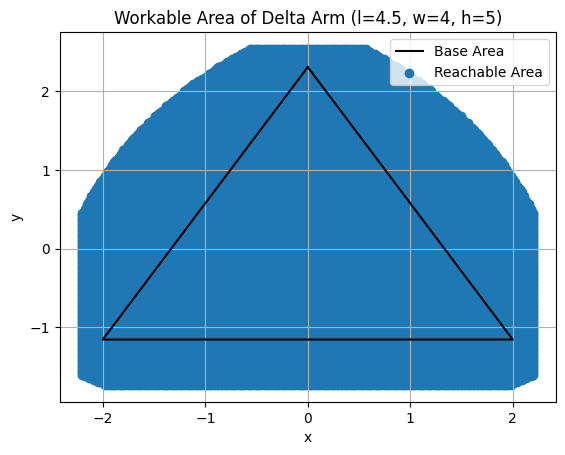

In [41]:
Abase = arm.base_A[0:2]
Bbase = arm.base_B[0:2]
Cbase = arm.base_C[0:2]

# Combine vertices into an array for easier plotting
vertices = np.array([Abase, Bbase, Cbase, Abase])  # Close the triangle by repeating Abase

# Plot the triangle
plt.figure()
plt.title(f'Workable Area of Delta Arm (l={arm.l}, w={arm.w}, h={arm.h})')
plt.plot(vertices[:, 0], vertices[:, 1], c='k', label='Base Area')
plt.scatter(x_plot, y_plot, label='Reachable Area')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [42]:
q = arm.ik(np.array([max(x_plot), max(y_plot), 0]))
q = arm.ik(np.zeros(3))
if not(np.any(np.isnan(q))):
    print(q)

[np.float64(3.862210075418822), np.float64(3.8622100754188224), np.float64(3.8622100754188224)]


## Arm Resolution

* x: position
* y: position
* z: magnitude of 3 q values

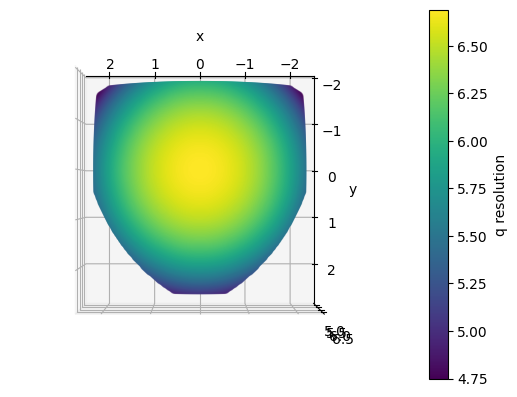

In [43]:
q = []

for x, y, in zip(x_plot, y_plot):
    q_vec = arm.ik(np.array([x, y, 0]))
    q.append(np.linalg.norm(q_vec))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
sc = ax.scatter(x_plot, y_plot, q, c=q, cmap='viridis')

# Add a colorbar to indicate the color mapping
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('q resolution')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Set the view to top-down (looking straight at the xy plane)
ax.view_init(elev=90, azim=90)

In [44]:
X, Y = np.meshgrid(x_range, y_range)
# Q = arm.ik(np.array([X, Y, 0]))

def func(X, Y):
    q = arm.ik(np.array([X, Y, 0]))
    # if not(np.any(np.isnan(q))):
    #     return 0
    # q = np.linalg.norm(q)
    return q

q = np.zeros((len(X[0, :]), len(Y[0, :]), 3))

for x in range(len(X[0, :])):
    for y in range(len(Y[0, :])):
        q[x, y] = func(X[0, x], Y[y, 0])

q

# func2 = np.vectorize(func)
# Q = func2(X, Y)

q[0, 0, :]

array([   nan, 1.5089, 4.4583])

In [45]:
# q[0, :, 0]
q[:, :, 0].shape

(200, 200)

In [46]:
qdx[0]

NameError: name 'qdx' is not defined

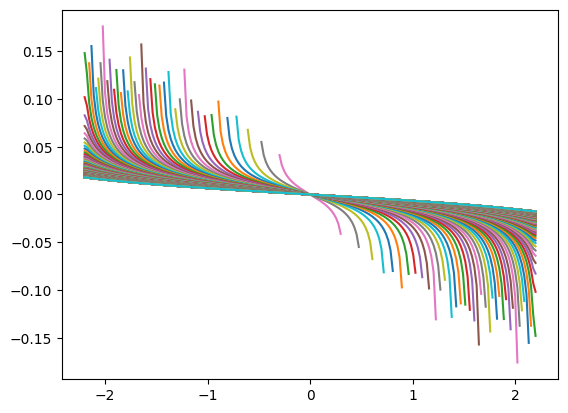

In [ ]:
slice = q[:, :, 0]
qdx, qdy = np.gradient(slice)
x_test = np.linspace(0, len(slice[0]), len(slice[0]))

plt.figure()
plt.plot(X[0, :], qdx)
plt.show()

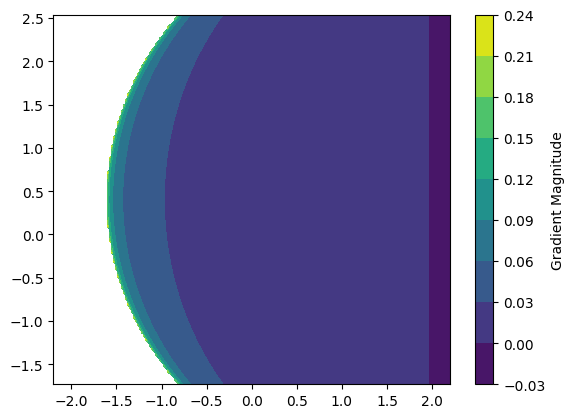

In [ ]:
fig, ax = plt.subplots()

contour = ax.contourf(X, Y, qdy)

cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('Gradient Magnitude')

plt.show()